# Question 4
### Reproduce Figure 1 in the paper. When doing that, try to slice data using `xarray` in the most clear and reproducible way (for example, don't use indices to access data objects like we did in the example above).

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [3]:
temp = ds.analysed_sst

In [4]:
#2002-2012 Data
temp_2002_2012 = temp.sel(time = slice("2002","2012"))

In [5]:
#2002-2012 grouped by month
temp_mean_2002_2012 = temp_2002_2012.groupby('time.month').mean('time')

In [6]:
#2014-2016 Data
temp_2014_2016 = temp.sel(time = slice("2014","2016"))

In [8]:
#monthly mean
temp_monthly_mean_2014_2016 = temp_2014_2016.resample(time='M').mean()

In [17]:
#anomaly
temp_anomaly = temp_monthly_mean_2014_2016.groupby('time.month') - temp_mean_2002_2012

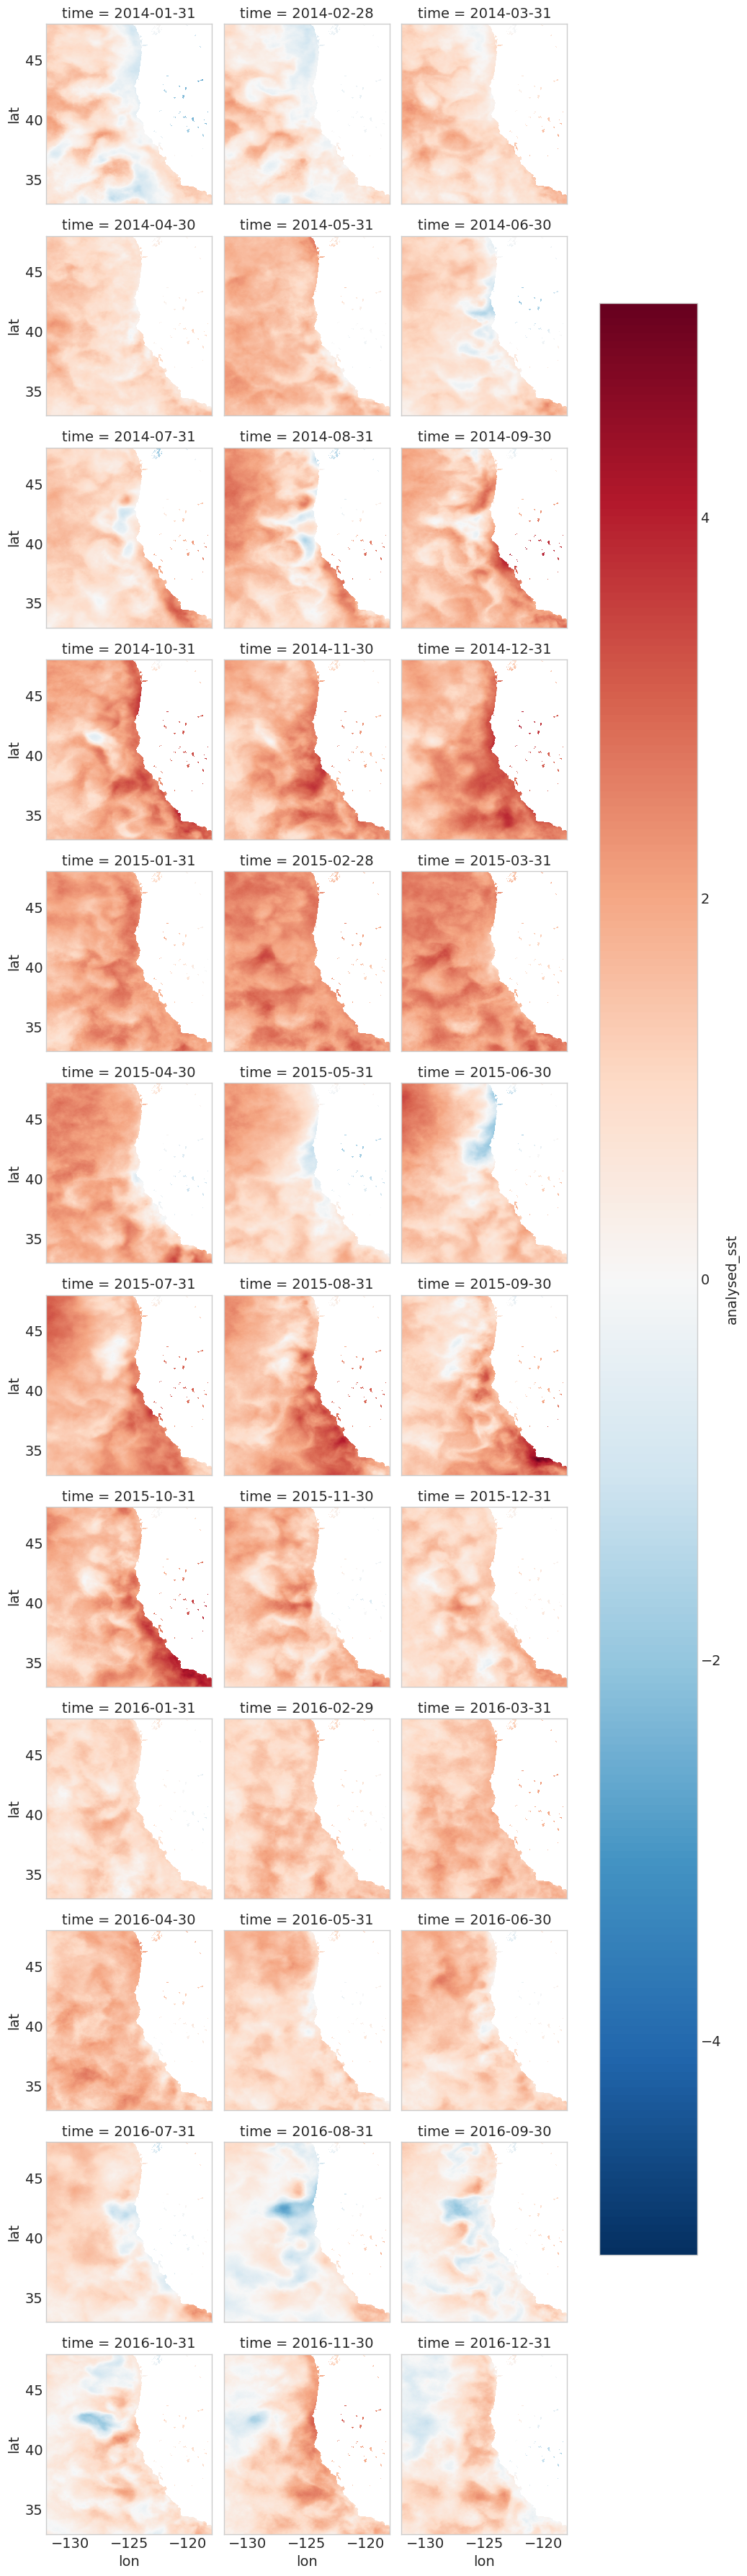

In [38]:
figure = temp_anomaly.plot(x="lon", y="lat", col="time", col_wrap=3)
# Plot on a map
#ax = plt.subplot(projection=crs)
#figure.plot(ax=ax, transform=crs)
#ax.coastlines("10m", color="k")
#ax.add_feature(cfeature.LAND, color="grey")
#ax.add_feature(cfeature.STATES.with_scale("10m"))